# Modelo K Vecinos mas cercanos

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obtencion de los datos

Se leera el archivo CSV que contiene el conjunto de datos de masas mamograficas.

In [24]:
mammographic_masses_clean = pd.read_csv("./processed/mammographic_masses_clean.csv")

In [25]:
mammographic_masses_clean.head()

,Age,Shape,Margin,Density,Severity
0,67,3,5,3,1
1,58,4,5,3,1
2,28,1,1,3,0
3,57,1,5,3,1
4,76,1,4,3,1


## Estandarizar las Variables

Importando StandardScaler de Scikit learn

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

** Ajuste scaler a las características.**

In [28]:
scaler.fit(mammographic_masses_clean.drop('Severity',axis=1))

/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

## Estandarizar las Variables

Importando StandardScaler de Scikit learn

**Use el método .transform() para transformar las características a una versión con la escala.**

In [29]:
scaled_features = scaler.transform(mammographic_masses_clean.drop('Severity',axis=1))

/ext/sage/sage-8.6_1804/local/lib/python2.7/site-packages/sage/repl/ipython_kernel/__main__.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  from ipykernel.kernelapp import IPKernelApp


In [30]:
df_feat = pd.DataFrame(scaled_features,columns=mammographic_masses_clean.columns[:-1])
df_feat.head()

,Age,Shape,Margin,Density
0,0.765804,0.174460,1.395631,0.240313
1,0.151666,0.979883,1.395631,0.240313
2,-1.895458,-1.436386,-1.158927,0.240313
3,0.083429,-1.436386,1.395631,0.240313
4,1.379941,-1.436386,0.756992,0.240313


In [31]:
## División en conjunto de entrenamiento y prueba

## Estandarizar las Variables

Importando StandardScaler de Scikit learn

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,mammographic_masses_clean['Severity'],
                                                    test_size=0.30)


## Uso de KNN (K vecinos más cercanos)


In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn = KNeighborsClassifier()

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
pred = knn.predict(X_test)

## Predicciones y Evaluaciones

In [40]:
from sklearn.metrics import classification_report,confusion_matrix

In [41]:
print(confusion_matrix(y_test,pred))

[[ 91  32]
 [ 23 104]]


In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       123
           1       0.76      0.82      0.79       127

   micro avg       0.78      0.78      0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



## Elección del valor de K

In [43]:
#Forma en la que se calcula el error
pron=[0,1,0,1,0]
real=[0,1,0,1,1]
c=np.mean(np.array(pron) != np.array(real))
print(c)

0.2


In [44]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Tasa de Error')

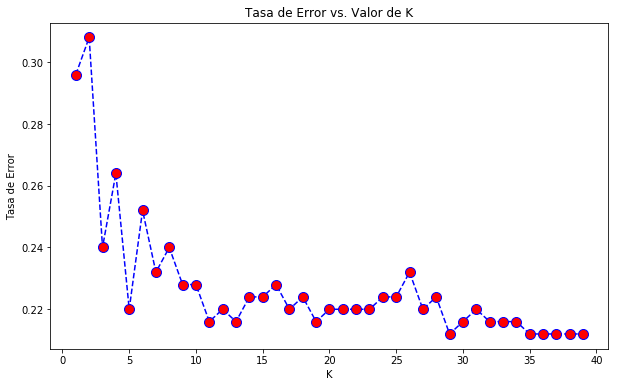

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

## Reentrenando con un nuevo valor K

In [51]:
# AHORA CON K=10
knn = KNeighborsClassifier()

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

CON K=30


[[ 91  32]
 [ 23 104]]


              precision    recall  f1-score   support

           0       0.80      0.74      0.77       123
           1       0.76      0.82      0.79       127

   micro avg       0.78      0.78      0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250

